#Imports

In [1]:
#@title
import sys
import pandas as pd
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)
import numpy as np
!git clone https://github.com/bosemessi/StatsbombOpenData --q
!pip install mplsoccer --q
from mplsoccer import Pitch, VerticalPitch
import ipywidgets as widgets
from ipywidgets import interact,interactive
import matplotlib.pyplot as plt
import matplotlib as mpl 
import matplotlib.font_manager as fm
!pip install highlight-text --q
from highlight_text import ax_text, fig_text
!pip install adjustText --q
from adjustText import adjust_text
!pip install gdown --quiet
import gdown
import matplotlib.patheffects as path_effects
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
import mpl_toolkits.axisartist.angle_helper as angle_helper
from matplotlib.projections import PolarAxes
from mpl_toolkits.axisartist.grid_finder import (FixedLocator, MaxNLocator,
                                                 DictFormatter)
import matplotlib.patches as patches
from PIL import Image
from io import StringIO, BytesIO
from tqdm import tqdm
import requests 
import warnings
warnings.filterwarnings('ignore')
from matplotlib.colors import LinearSegmentedColormap
from scipy.interpolate import RegularGridInterpolator

     |████████████████████████████████| 61kB 2.5MB/s 


#Logo and fontfiles

In [2]:
#@title

### The fonts
gdown.download('https://drive.google.com/uc?id=13ztlAubCFZN6TT3k6KFbgxuRWJSMdkaD',
               'slabo.ttf',quiet=True)
gdown.download('https://drive.google.com/uc?id=1l-uC5c6FWte1RWhI-3tCMQscKDKQHNVQ',
               'spectral.ttf',quiet=True)
gdown.download('https://drive.google.com/uc?id=1aUF9E87xWe9IL4hGGZbVSXqtb7QQsTMp',
               'spacegrotesk.ttf',quiet=True)
gdown.download('https://drive.google.com/uc?id=1i_wkthqp4-SLeQgyt__T71m6iqJbRBff',
               'rubik.ttf',quiet=True)
gdown.download('https://drive.google.com/uc?id=1hzV84z5YbhyM3YTy7-SNt3db2Ct9PfY6',
               'robotoslab.ttf',quiet=True)
gdown.download('https://drive.google.com/uc?id=1MqfLz6BqjBbJQ5awgTKyRn_2rd1RePUz',
               'neuton.ttf',quiet=True)
gdown.download('https://drive.google.com/uc?id=1VfqoD3Fe2OFoIJAJIYSHpe862Yi82xKw',
               'Montserrat-Light.ttf',quiet=True)

import matplotlib.font_manager as fm
fm.fontManager.addfont('slabo.ttf')
fm.fontManager.addfont('spectral.ttf')
fm.fontManager.addfont('spacegrotesk.ttf')
fm.fontManager.addfont('rubik.ttf')
fm.fontManager.addfont('robotoslab.ttf')
fm.fontManager.addfont('neuton.ttf')
fm.fontManager.addfont('Montserrat-Light.ttf')
fontlist = ['Roboto Slab','Rubik','Slabo 27px','Space Grotesk','Spectral',
            'Montserrat']

#### Statsbomb logos

url2 = "https://drive.google.com/file/d/1HwdhRXaVMNwNXlMxiOS3afFRdM2Vz5ZV/view?usp=sharing"
file_id = url2.split('/')[-2]
sb_url='https://drive.google.com/uc?export=download&id=' + file_id
response = requests.get(sb_url)
sb = Image.open(BytesIO(response.content))

#Read the percentile Data

In [3]:
#@title

df = pd.read_csv('/content/StatsbombOpenData/CombinedData.csv',
                     encoding='utf-8-sig').reset_index(drop=True)
df.head()

,name,time,team,Padj_Defensive Acts,Turnovers,Aerial Challenges,Aerial Win %,True Tackle Win%,Padj_Pressures,Padj_Successful Pressures,Dribbles,xT,xT Facilitated,xGBuildup,xGChain,Successful Passes,Successful Long Passes,Successful Final Third Passes,Successful Under Pressure Passes,Successful Progressive Passes,Total Pass Length,Carries,Carry Distance,Final Third Entries,Progressive Moves,Passes Success %,Long Passes Success %,Under Pressure Passes Success %,Progressive Passes Success %,PPF,CPF,Open Play Passes,Pass Completed Above Expected,Successful Passes and Carries,Turnovers per 100 Touches,Percentile Padj_Defensive Acts,Percentile Turnovers,Percentile Aerial Challenges,Percentile Aerial Win %,Percentile True Tackle Win%,Percentile Padj_Pressures,Percentile Padj_Successful Pressures,Percentile Dribbles,Percentile xT,Percentile xT Facilitated,Percentile xGBuildup,Percentile xGChain,Percentile Successful Passes,Percentile Successful Long Passes,Percentile Successful Final Third Passes,Percentile Successful Under Pressure Passes,Percentile Successful Progressive Passes,Percentile Total Pass Length,Percentile Carries,Percentile Carry Distance,Percentile Final Third Entries,Percentile Progressive Moves,Percentile Passes Success %,Percentile Long Passes Success %,Percentile Under Pressure Passes Success %,Percentile Progressive Passes Success %,Percentile PPF,Percentile CPF,Percentile Open Play Passes,Percentile Pass Completed Above Expected,Percentile Successful Passes and Carries,Percentile Turnovers per 100 Touches
0,Ahmed Hegazi,285,Egypt,9.577760,0.631579,1.894737,33.333333,50.000000,4.330910,0.669004,0.000000,0.106962,0.070874,0.110213,0.110213,29.368421,10.105263,1.263158,4.736842,3.473684,1089.925494,29.052632,191.405111,1.578947,3.789474,74.400000,71.111111,65.217391,39.285714,0.445737,0.517960,124,0.972886,58.421053,2.173913,0.431373,0.843137,0.401961,0.254902,0.774510,0.274510,0.215686,0.264706,0.470588,0.176471,0.352941,0.352941,0.176471,0.745098,0.166667,0.392157,0.490196,0.411765,0.294118,0.392157,0.196078,0.372549,0.088235,0.431373,0.235294,0.176471,0.647059,0.392157,0.176471,0.078431,0.215686,0.941176
1,Andreas Christensen,311,Denmark,8.372283,1.157556,1.446945,75.000000,47.500000,6.685373,1.035599,0.289389,0.067280,0.069918,0.190644,0.190644,44.565916,5.209003,2.025723,5.498392,1.736334,977.163643,38.199357,201.523577,2.025723,2.025723,92.771084,78.260870,90.476190,46.153846,0.314525,0.580109,164,1.036486,82.765273,3.007519,0.254902,1.000000,0.215686,0.774510,0.745098,0.490196,0.352941,0.627451,0.137255,0.156863,0.725490,0.686275,0.509804,0.137255,0.431373,0.568627,0.117647,0.254902,0.509804,0.470588,0.333333,0.098039,0.941176,0.735294,1.000000,0.450980,0.117647,0.666667,0.411765,0.901961,0.509804,0.960784
2,Andreas Granqvist,476,Sweden,6.699182,0.378151,1.512605,80.000000,13.333333,2.348759,0.175648,0.378151,0.184317,0.134002,0.072784,0.074888,26.470588,5.861345,2.079832,5.672269,2.836134,827.185910,23.445378,159.817139,2.647059,4.159664,81.871345,64.583333,83.333333,44.117647,0.449494,0.599963,159,1.022725,49.915966,1.587302,0.156863,0.647059,0.235294,0.901961,0.205882,0.058824,0.019608,0.764706,0.941176,0.764706,0.078431,0.098039,0.078431,0.196078,0.450980,0.607843,0.274510,0.078431,0.098039,0.235294,0.509804,0.431373,0.254902,0.274510,0.764706,0.352941,0.705882,0.784314,0.372549,0.705882,0.078431,0.823529
3,Anga Dedryck Boyata,280,Belgium,12.288028,0.000000,3.857143,40.740741,6.666667,6.718032,1.517321,0.000000,0.055122,0.064727,0.180093,0.180093,58.178571,5.464286,0.321429,4.821429,1.285714,1193.322794,52.071429,195.081015,0.321429,1.285714,94.270833,89.473684,65.217391,100.000000,0.305695,0.453728,192,1.007042,110.250000,0.000000,0.647059,0.186275,0.843137,0.372549,0.058824,0.509804,0.549020,0.264706,0.078431,0.117647,0.705882,0.647059,0.784314,0.156863,0.039216,0.450980,0.039216,0.568627,0.784314,0.431373,0.039216,0.039216,0.980392,0.980392,0.235294,1.000000,0.098039,0.176471,0.549020,0.352941,0.803922,

#Define some widgets

In [4]:
#@title
X = widgets.Dropdown(
    options=df.columns.tolist()[3:],
    value=df.columns.tolist()[3],
    description='Quantity 1',
    disabled=False,
)
Y = widgets.Dropdown(
    options=df.columns.tolist()[3:],
    value=df.columns.tolist()[4],
    description='Quantity 2',
    disabled=False,
)
bgcolor = widgets.ColorPicker(
        concise=False,
        description='Pick background color',
        layout={'width':'max-content'},
        style={'description_width': 'initial'},
        value='#222222',
        disabled=False)

scat_col = widgets.ColorPicker(
        concise=False,
        description='Pick scatter color',
        layout={'width':'max-content'},
        style={'description_width': 'initial'},
        value='#d2d2e5',
        disabled=False
        )

text_col = widgets.ColorPicker(
        concise=False,
        description='Pick text color',
        layout={'width':'max-content'},
        style={'description_width': 'initial'},
        value='#ffffff',
        disabled=False
        )

grid_col = widgets.ColorPicker(
        concise=False,
        description='Pick grid color',
        layout={'width':'max-content'},
        style={'description_width': 'initial'},
        value='#ffffff',
        disabled=False
        )

highlight_col = widgets.ColorPicker(
        concise=False,
        description='Pick highlight color',
        layout={'width':'max-content'},
        style={'description_width': 'initial'},
        value='#d61f0a',
        disabled=False
        )

fontchoice = widgets.Dropdown(
    options=fontlist,
    value='Slabo 27px',
    description='Font',
    disabled=False,
)

invert_x_axis = widgets.Dropdown(
    options=['Yes','No'],
    value='No',
    description='Invert x-axis ?',
    layout={'width':'max-content'},
    style={'description_width': 'initial'},
    disabled=False,
)
invert_y_axis = widgets.Dropdown(
    options=['Yes','No'],
    value='No',
    description='Invert y-axis ?',
    layout={'width':'max-content'},
    style={'description_width': 'initial'},
    disabled=False,
)
add_median = widgets.Dropdown(
    options=['Yes','No'],
    value='Yes',
    description='Add median lines ?',
    layout={'width':'max-content'},
    style={'description_width': 'initial'},
    disabled=False,
)
add_IQR = widgets.Dropdown(
    options=['Yes','No'],
    value='Yes',
    description='Shade IQR ?',
    layout={'width':'max-content'},
    style={'description_width': 'initial'},
    disabled=False,
)
#@title
textbox = widgets.Text(
    value='',
    placeholder='',
    description='Title String:',
    style={'description_width': 'initial'},
    layout={'width':'max-content'},
    disabled=False
)

#Plot customizations

In [5]:
#@title

box1 = widgets.HBox([bgcolor,scat_col,text_col])
box2 = widgets.HBox([grid_col,highlight_col,fontchoice])
box3 = widgets.HBox([X,Y])
box4 = widgets.HBox([invert_x_axis, invert_y_axis, add_median, add_IQR, textbox])
BOX1 = widgets.VBox(children=[box1,box2])
display(BOX1)

#Data customizations

In [6]:
#@title

box3 = widgets.HBox([X,Y])
box4 = widgets.HBox([invert_x_axis, invert_y_axis, add_median, add_IQR, textbox])
BOX2 = widgets.VBox(children=[box3,box4])
display(BOX2)

#The actual scatter plotter

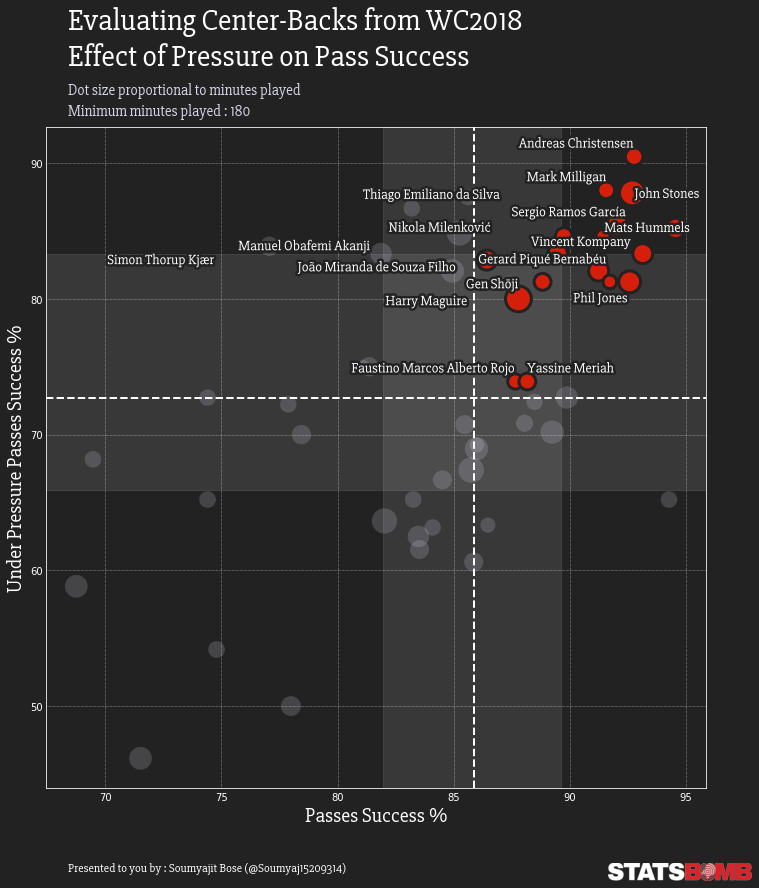

In [20]:
#@title
fig,ax = plt.subplots(figsize=(10,10))
ax.tick_params(axis='x', colors=text_col.value)
ax.tick_params(axis='y', colors=text_col.value)
ax.margins(x=0.05)
fig.set_facecolor(bgcolor.value)
ax.patch.set_facecolor(bgcolor.value)
ax.grid(ls='dotted',lw=0.5,color=grid_col.value,zorder=1)

qty1 = X.value
qty2 = Y.value

scatterdf = df.copy()    

ax.scatter(scatterdf[qty1],scatterdf[qty2],s=scatterdf['time'],color=scat_col.value,
           edgecolors=bgcolor.value,alpha=0.2,lw=0.5,zorder=2)
Q31 = np.quantile(scatterdf[qty1], 0.75)
Q11 = np.quantile(scatterdf[qty1], 0.25)
IQR1 = Q31 - Q11
Q32 = np.quantile(scatterdf[qty2], 0.75)
Q12 = np.quantile(scatterdf[qty2], 0.25)
IQR2 = Q32 - Q12
# PDf = scatterdf[(scatterdf[qty1]>Q31) & (scatterdf[qty2]>Q32)]
PDf = scatterdf[(scatterdf[qty1]>scatterdf[qty1].median()) & 
                (scatterdf[qty2]>scatterdf[qty2].median())]
hp = PDf.name.unique().tolist()

ax.scatter(PDf[qty1],PDf[qty2],s=PDf['time'],color=highlight_col.value,
           edgecolors=bgcolor.value,alpha=1,lw=3,zorder=4)

if invert_x_axis.value=='Yes':
    ax.set_xlim(ax.get_xlim()[::-1])

if invert_y_axis.value=='Yes':
    ax.set_ylim(ax.get_ylim()[::-1])
    
if add_median.value=='Yes':
    x_median = np.median(scatterdf[qty1])
    y_median = np.median(scatterdf[qty2])
    ax.axhline(y_median, linestyle='--',lw=2,color=text_col.value)
    ax.axvline(x_median, linestyle='--',lw=2,color=text_col.value)

if add_IQR.value=='Yes':
    ax.axvspan(Q11,Q31,color=text_col.value,alpha=0.1)
    ax.axhspan(Q12,Q32,color=text_col.value,alpha=0.1)
    
small_offset = (scatterdf[qty2].max() - scatterdf[qty2].min())/100.0

if len(hp)>0:
    xs = PDf[qty1].tolist()
    ys = PDf[qty2].tolist()
    labels = hp
  
    texts = []
    for x, y, s in zip(xs, ys, labels):
        text = ax.text(x, y+small_offset, s, color=text_col.value,fontsize=14,ha='center',zorder=5,
                            fontfamily=fontchoice.value)
        text.set_path_effects([path_effects.Stroke(linewidth=5, foreground=bgcolor.value),
                       path_effects.Normal()])
        texts.append(text)
        
    adjust_text(texts, force_points=0.1, force_text=0.1,
              expand_points=(1, 1), expand_text=(1, 1))

fig.text(0.1,-0.05,'Presented to you by : Soumyajit Bose (@Soumyaj15209314)',fontsize=12,
         color=text_col.value,fontfamily=fontchoice.value)

ax.set_xlabel(qty1, fontweight='bold', fontsize=20, color=text_col.value,fontfamily=fontchoice.value)
ax.set_ylabel(qty2, fontweight='bold', fontsize=20, color=text_col.value,fontfamily=fontchoice.value)
ax.tick_params(axis='both',length=0)

main_title = 'Evaluating Center-Backs from WC2018'     
subtitle1 = textbox.value
subtitle2 = 'Dot size proportional to minutes played'   
subtitle3 = 'Minimum minutes played : 180'

fig.text(0.1,1.12,main_title,fontsize=30,fontweight='black',color=text_col.value,
             fontfamily=fontchoice.value)
fig.text(0.1,1.07,subtitle1,fontsize=30,fontweight='black',color=text_col.value,
             fontfamily=fontchoice.value)
fig.text(0.1,1.03,subtitle2,fontsize=15,color=scat_col.value,
             fontfamily=fontchoice.value)
fig.text(0.1,1.0,subtitle3,fontsize=15,color=scat_col.value,
             fontfamily=fontchoice.value)

spines = ['top','right','bottom','left']
for s in spines:
    ax.spines[s].set_color(text_col.value)
    
ax3 = fig.add_axes([0.85,-0.15,0.2,0.2])
ax3.axis('off')
ax3.imshow(sb)

plt.tight_layout()

#Section for plotting bar charts for players

In [23]:
quants = ['Percentile Padj_Defensive Acts',
 'Percentile Aerial Win %','Percentile True Tackle Win%',
 'Percentile Padj_Pressures','Percentile xT',
 'Percentile xT Facilitated','Percentile xGBuildup',
 'Percentile Final Third Entries','Percentile Progressive Moves',
 'Percentile Passes Success %','Percentile Under Pressure Passes Success %',
 'Percentile Pass Completed Above Expected',
 'Percentile Successful Passes and Carries',
 'Percentile Turnovers per 100 Touches']

In [25]:
names = ['Gerard Piqué Bernabéu','Harry Maguire','Mats Hummels',
                 'Sergio Ramos García','Simon Thorup Kjær','Toby Alderweireld']

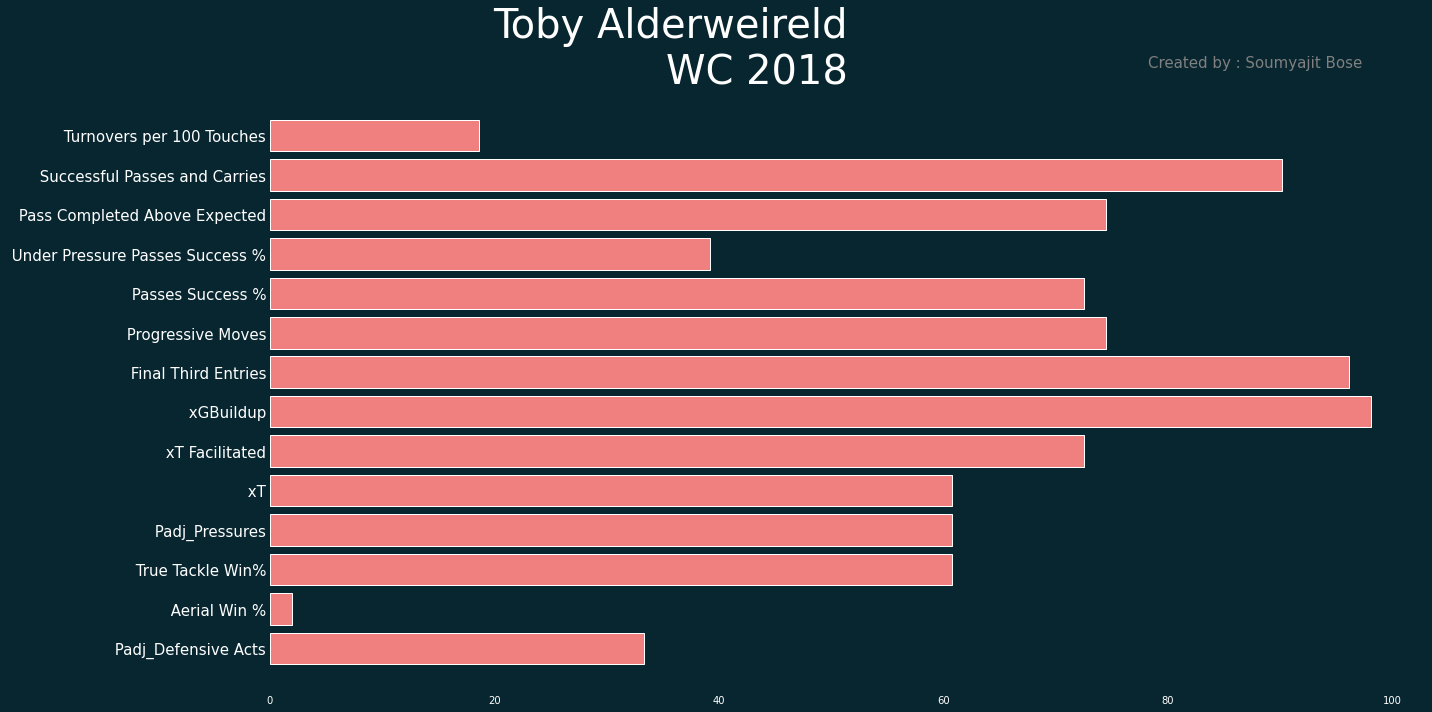

In [53]:
barWidth = 0.85
player = names[5]
bar1 = [df[df.name==player][q].values.item()*100 for q in quants]
r = [i for i in range(len(quants))]
fig,ax = plt.subplots(figsize=(20,10))
fig1 = ax.barh(r, bar1, color='lightcoral', edgecolor='white',label='Player Chemistry')
plt.yticks(r, [quants[i][10:] for i in range(len(quants))], fontsize=15,
           color='w')
plt.xticks([0,20,40,60,80,100],color='w')
ax.tick_params(length=0)
for s in ['top','right','bottom', 'left']:
    ax.spines[s].set_visible(False)
ax.set_facecolor('#082630')
fig.set_facecolor('#082630')
# plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1,fontsize=15)
ax.set_title(player+'\n'+"WC 2018",fontsize=40,va='center',ha='right',color='w')
fig.text(0.8,0.9,'Created by : Soumyajit Bose',fontsize=15,color='grey')
plt.tight_layout()

#Section for plotting progressive passes and carries for players

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [66]:
df2 = pd.read_parquet('/content/StatsbombOpenData/WC2018.parquet').reset_index(drop=True)
Df = df2[df2.location.notna()].reset_index(drop=True)
Df[['x','y']] = np.array(list(Df.location))
Df['endloc'] = np.where(Df.type_name=='Pass',Df.pass_end_location,
                        np.where(Df.type_name=='Carry',Df.carry_end_location,Df.location))
Df[['endX','endY']] = np.array(list(Df.endloc))
Df['dist1'] = np.sqrt((Df.x - 120)**2 + (Df.y - 40)**2)
Df['dist2'] = np.sqrt((Df.endX - 120)**2 + (Df.endY - 40)**2)
Df['diffdist'] = Df['dist1'] - Df['dist2']
passmask = Df.type_name=='Pass'
successmask = Df.pass_outcome_name.isna()
openplaymask = Df.pass_type_name.isna()
penaltyareamask = (Df.endX > 102) & (np.abs(Df.endY - 40) < 22)
distmask = (Df['dist1'] - Df['dist2'])/Df['dist1'] > 0.25
boxmask = ~(Df.x > 102) & (np.abs(Df.y - 40) < 22)
progmask = distmask | (boxmask & penaltyareamask)
carrymask = Df.type_name=='Carry'

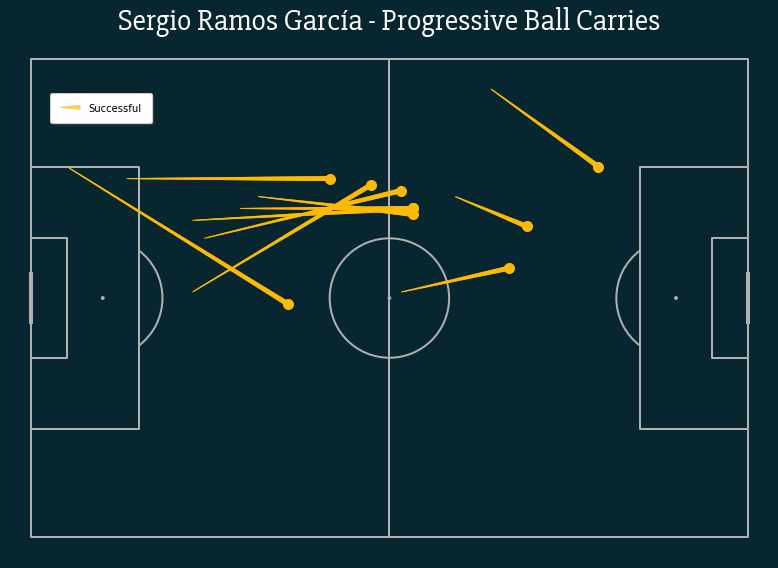

In [99]:
pitch = Pitch(pitch_color='#082630')
player = names[3]
fig,ax = pitch.draw(figsize=(12,8))

playerprogpasses = Df[(Df.player_name==player)&carrymask&progmask]

pitch.lines(playerprogpasses[successmask].x, playerprogpasses[successmask].y,
            playerprogpasses[successmask].endX, playerprogpasses[successmask].endY,
            lw=5,comet=True,zorder=5,ax=ax,color='#fcba03',label='Successful')
pitch.scatter(playerprogpasses[successmask].endX, playerprogpasses[successmask].endY,
            s=100,zorder=6,ax=ax,color='#fcba03')
# pitch.lines(playerprogpasses[~successmask].x, playerprogpasses[~successmask].y,
#             playerprogpasses[~successmask].endX, playerprogpasses[~successmask].endY,
#             lw=5,comet=True,zorder=3,ax=ax,color='#b0afac',label='Unsuccessful')
# pitch.scatter(playerprogpasses[~successmask].endX, playerprogpasses[~successmask].endY,
#             s=100,zorder=4,ax=ax,color='#b0afac')
ax.legend(loc='upper left', bbox_to_anchor=(0.05,0.9),fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.set_title(player+' - Progressive Ball Carries',fontsize=30,fontfamily='Slabo 27px',
             color='w')
fig.set_facecolor('#082630')